# Spotify Analyzer & Songs Recommendation System

### Daniel Truong

## Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Datasets

In [107]:
spotify_df = pd.read_excel("Spotify Songs.xlsx")
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
0,0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.552,0.357,199,0.0332,0.1090,82
1,1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.106,0.168,263,0.1630,0.0232,85
2,2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.083,0.579,164,0.0470,0.0856,75
3,3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.132,0.394,217,0.1840,0.0300,80
4,4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.131,0.129,218,0.1240,0.0712,84


In [108]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    384 non-null    int64  
 1   title         384 non-null    object 
 2   artist        384 non-null    object 
 3   top genre     384 non-null    object 
 4   year          384 non-null    int64  
 5   loudness      384 non-null    float64
 6   energy        384 non-null    float64
 7   liveness      384 non-null    float64
 8   valence       384 non-null    float64
 9   dur           384 non-null    int64  
 10  acousticness  384 non-null    float64
 11  speechiness   384 non-null    float64
 12  pop           384 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 39.1+ KB


## Data Preprocessing

In [109]:
spotify_df = spotify_df.drop('Unnamed: 0',axis=1)

In [110]:
#Check if there are any missing data
spotify_df.isnull().sum()

title           0
artist          0
top genre       0
year            0
loudness        0
energy          0
liveness        0
valence         0
dur             0
acousticness    0
speechiness     0
pop             0
dtype: int64

In [111]:
spotify_df.head()

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.552,0.357,199,0.0332,0.1090,82
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.106,0.168,263,0.1630,0.0232,85
2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.083,0.579,164,0.0470,0.0856,75
3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.132,0.394,217,0.1840,0.0300,80
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.131,0.129,218,0.1240,0.0712,84


In [112]:
# Drop duplicate songs
spotify_df.drop_duplicates(subset ="title",keep = False, inplace = True)

In [113]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         384 non-null    object 
 1   artist        384 non-null    object 
 2   top genre     384 non-null    object 
 3   year          384 non-null    int64  
 4   loudness      384 non-null    float64
 5   energy        384 non-null    float64
 6   liveness      384 non-null    float64
 7   valence       384 non-null    float64
 8   dur           384 non-null    int64  
 9   acousticness  384 non-null    float64
 10  speechiness   384 non-null    float64
 11  pop           384 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 39.0+ KB


In [114]:
spotify_df.to_excel("Spotify Songs.xlsx",sheet_name="Sheet 1")

# 1) Analyze Hot Songs from 2017 - 2022

> Note: Some songs are from before 2017 because they're popular during 2017 - 2022 year range

## Trends

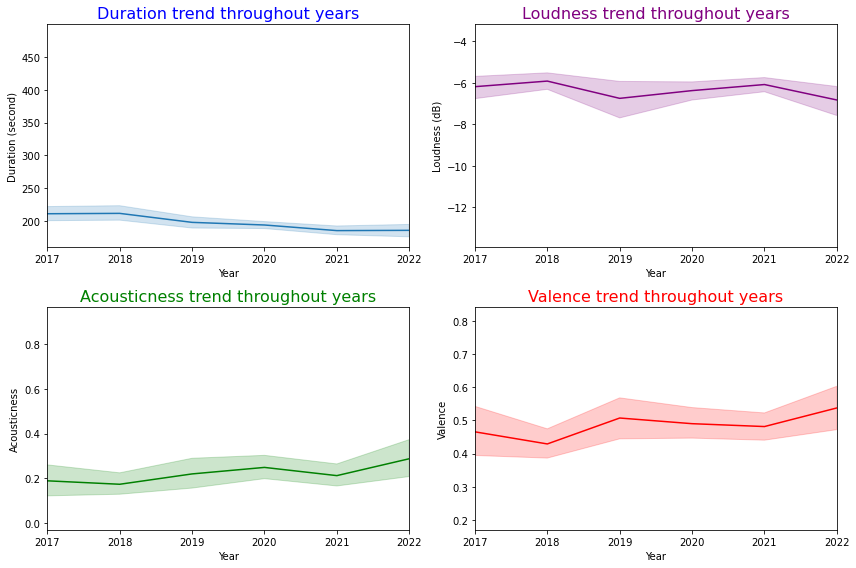

In [119]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
#Duration trend
sns.lineplot(data=spotify_df,x="year",y="dur",ax=axes[0][0]);
axes[0][0].set_xlim(2017,2022)
axes[0][0].set_ylabel("Duration (second)")
axes[0][0].set_xlabel("Year")
axes[0][0].set_title("Duration trend throughout years", fontsize=16,color="blue")

#Loundness trend
sns.lineplot(data=spotify_df,x="year",y="loudness",ax=axes[0][1],color="purple")
axes[0][1].set_xlim(2017,2022)
axes[0][1].set_ylabel("Loudness (dB)")
axes[0][1].set_xlabel("Year")
axes[0][1].set_title("Loudness trend throughout years", fontsize=16,color="purple")

#Acousticness trend
sns.lineplot(data=spotify_df,x="year",y="acousticness",ax=axes[1][0],color="green")
axes[1][0].set_xlim(2017,2022)
axes[1][0].set_ylabel("Acousticness")
axes[1][0].set_xlabel("Year")
axes[1][0].set_title("Acousticness trend throughout years", fontsize=16,color="green")

#Valence trend
sns.lineplot(data=spotify_df,x="year",y="valence",ax=axes[1][1],color="red")
axes[1][1].set_xlim(2017,2022)
axes[1][1].set_ylabel("Valence")
axes[1][1].set_xlabel("Year")
axes[1][1].set_title("Valence trend throughout years", fontsize=16,color="red")

plt.tight_layout()

### **Songs apparently become shorter, less louder,more acoustic, more valence (happier) throughout the years**

# Song Features Correlations

<AxesSubplot:title={'center':'Correlations between features'}>

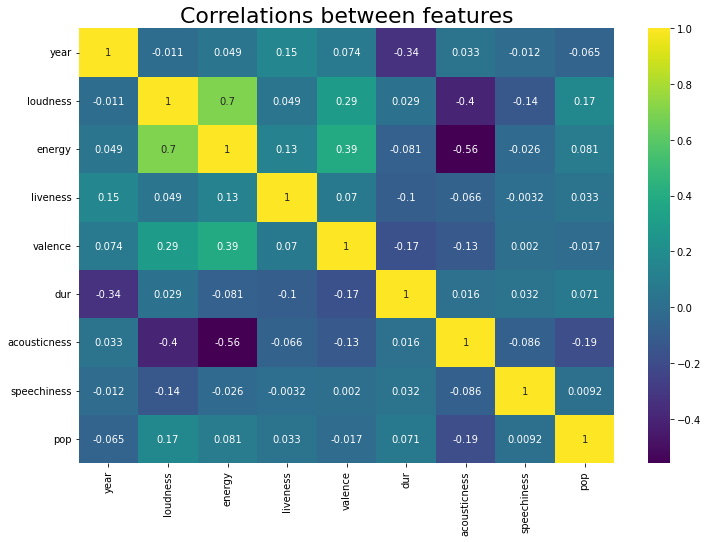

In [149]:
plt.figure(figsize=(12,8))
plt.title("Correlations between features",fontsize=22)
sns.heatmap(spotify_df.corr(),annot=True,cmap="viridis")

## Are shorter songs more popular?

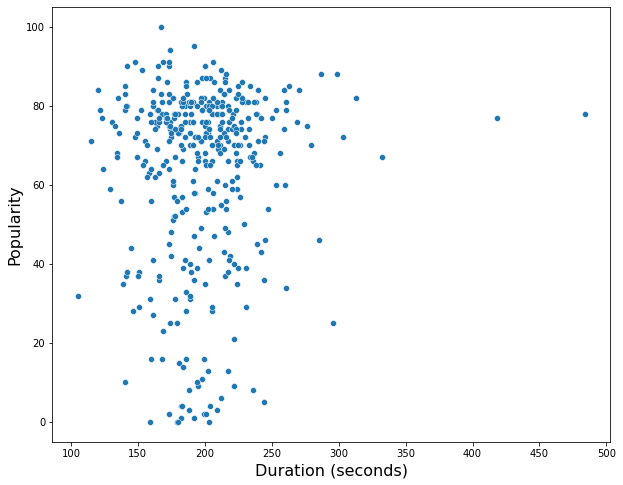

In [152]:
plt.figure(figsize=(10,8))
plt.xlabel("Duration (seconds)",fontsize=16)
plt.ylabel("Popularity",fontsize=16)
sns.scatterplot(x="dur",y="pop",data=spotify_df);

### *Most popular songs have duration about 200 seconds or 3.3 minutes*

# Top 10 Artists number of songs released

In [153]:
spotify_df.value_counts("artist")[:10]

artist
Ed Sheeran         8
Imagine Dragons    7
Drake              7
The Weeknd         7
Justin Bieber      6
Post Malone        6
Camila Cabello     6
Lil Baby           6
Dua Lipa           6
Cardi B            5
dtype: int64

# Numbers of songs each year

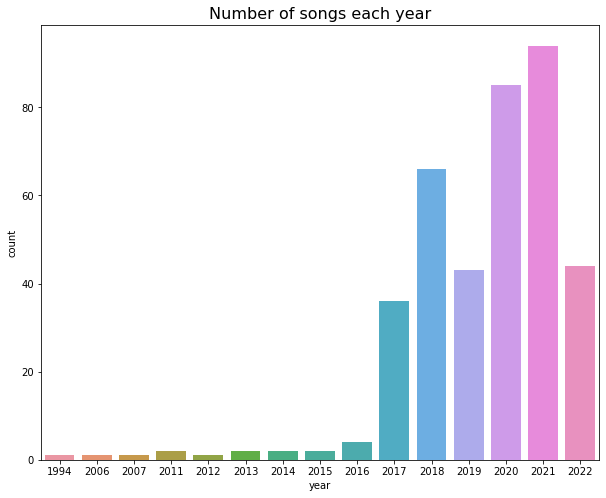

In [154]:
plt.figure(figsize=(10,8))
plt.title("Number of songs each year",fontsize=16)
sns.countplot(data=spotify_df,x='year');

# Most popular song each year

In [155]:
spotify_df_by_years = spotify_df.loc[spotify_df.groupby(['year'])['pop'].idxmax()]
spotify_df_by_years = spotify_df_by_years.set_index('year')
spotify_df_by_years[['title','artist']]

,title,artist
year,,
1994,All I Want for Christmas Is You,Mariah Carey
2006,"Sorry, Blame It On Me",Akon
2007,I Use What I Got,Jason Aldean
2011,Someone Like You,Adele
2012,Good Old Days,P!nk
2013,All of Me,John Legend
2014,Photograph,Ed Sheeran
2015,One Call Away - Acoustic,Charlie Puth
2016,Let Me Love You,DJ Snake


# 2) Spotify Recommendation System

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import pprint
from spotipy.oauth2 import SpotifyClientCredentials

## Personal Spotify Datasets

In [65]:
client_credentials_manager = SpotifyClientCredentials(client_id="", client_secret="")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [66]:
results = sp.playlist("https://open.spotify.com/playlist/2QFZ21dpDz5Z9ufKJGBOsf")
pp = pprint.PrettyPrinter(indent=4)

tracks = results["tracks"]["items"]
song_arr = []

track_arr = []
track_uri_arr = []
artist_arr = []
features = []


for track in tracks:
    #Track URI:
    track_uri = track["track"]["uri"]
    feature = sp.audio_features(track_uri)
    feature_dict = feature[0]
    
    #Track name:
    track_name = track["track"]["name"]
    
    #Track popularity:
    track_pop = track["track"]["popularity"]

    #Track year:
    track_year = track["track"]["album"]["release_date"][:4]
    
    #Track duration:
    track_duration_second = track["track"]["duration_ms"]*0.001
    track_duration = (round(track_duration_second,0))
    
    #Aritst info:
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Artist name:
    artist_name = track["track"]["artists"][0]["name"]
                       
    #Artist genre:
    artist_genre = artist_info["genres"]
    
    song_dict = {"dur":track_duration,"pop":track_pop,"year":track_year,"top genre":artist_genre,"artist":artist_name,"title":track_name}
    song_dict_fin = {**song_dict, **feature_dict} 
    song_arr.append(song_dict_fin)
    

# Data Preprocessing

In [68]:
Daniel_playlist = pd.DataFrame(song_arr)
Daniel_playlist.tail()

,dur,pop,year,top genre,artist,title,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
15,215.0,82,2019,"[pop, uk pop]",Lewis Capaldi,Before You Go,0.459,0.575,3,-4.858,...,0.0885,0.183,111.881,audio_features,2gMXnyrvIjhVBUZwvLZDMP,spotify:track:2gMXnyrvIjhVBUZwvLZDMP,https://api.spotify.com/v1/tracks/2gMXnyrvIjhV...,https://api.spotify.com/v1/audio-analysis/2gMX...,215107,4
16,259.0,84,2014,"[pop, uk pop]",Ed Sheeran,Photograph,0.614,0.379,4,-10.480,...,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987,4
17,484.0,78,2013,"[dance pop, pop]",Justin Timberlake,Mirrors,0.574,0.512,5,-6.664,...,0.0946,0.512,76.899,audio_features,4rHZZAmHpZrA3iH5zx8frV,spotify:track:4rHZZAmHpZrA3iH5zx8frV,https://api.spotify.com/v1/tracks/4rHZZAmHpZrA...,https://api.spotify.com/v1/audio-analysis/4rHZ...,484147,4
18,192.0,95,2022,"[dance pop, escape room, minnesota hip hop, po...",Lizzo,About Damn Time,0.836,0.743,10,-6.305,...,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4
19,207.0,86,2022,[pop],Tate McRae,she's all i wanna be,0.614,0.644,2,-5.372,...,0.1170,0.651,160.036,audio_features,0IuVhCflrQPMGRrOyoY5RW,spotify:track:0IuVhCflrQPMGRrOyoY5RW,https://api.spotify.com/v1/tracks/0IuVhCflrQPM...,https://api.spotify.com/v1/audio-analysis/0IuV...,206772,4


In [69]:
Daniel_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               20 non-null     float64
 1   pop               20 non-null     int64  
 2   year              20 non-null     object 
 3   top genre         20 non-null     object 
 4   artist            20 non-null     object 
 5   title             20 non-null     object 
 6   danceability      20 non-null     float64
 7   energy            20 non-null     float64
 8   key               20 non-null     int64  
 9   loudness          20 non-null     float64
 10  mode              20 non-null     int64  
 11  speechiness       20 non-null     float64
 12  acousticness      20 non-null     float64
 13  instrumentalness  20 non-null     float64
 14  liveness          20 non-null     float64
 15  valence           20 non-null     float64
 16  tempo             20 non-null     float64
 17 

In [70]:
Daniel_playlist.isnull().sum()

dur                 0
pop                 0
year                0
top genre           0
artist              0
title               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [72]:
Daniel_playlist.isna().sum()

dur                 0
pop                 0
year                0
top genre           0
artist              0
title               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

### Drop unecessary columns

In [73]:
cols_to_drop = ['mode','key','type','id','uri','track_href','analysis_url','duration_ms','time_signature']
Daniel_playlist = Daniel_playlist.drop(cols_to_drop,axis=1)

In [74]:
Daniel_playlist.head()

,dur,pop,year,top genre,artist,title,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,263.0,85,2017,"[pop, uk pop]",Ed Sheeran,Perfect,0.599,0.448,-6.312,0.0232,0.16300,0.00000,0.106,0.168,95.050
1,218.0,84,2018,"[dfw rap, melodic rap, rap]",Post Malone,rockstar (feat. 21 Savage),0.585,0.520,-6.136,0.0712,0.12400,0.00007,0.131,0.129,159.801
2,167.0,83,2018,"[emo rap, miami hip hop]",XXXTENTACION,SAD!,0.740,0.613,-4.880,0.1450,0.25800,0.00372,0.123,0.473,75.023
3,187.0,83,2017,"[modern rock, rock]",Imagine Dragons,Thunder,0.605,0.822,-4.833,0.0438,0.00671,0.13400,0.147,0.288,167.997
4,223.0,79,2016,"[dfw rap, melodic rap, rap]",Post Malone,I Fall Apart,0.556,0.538,-5.408,0.0382,0.06890,0.00000,0.196,0.291,143.950


### Reorder Columns

In [75]:
Daniel_playlist = Daniel_playlist.reindex(columns=['title','artist','top genre','year','loudness','energy','liveness','valence','dur','acousticness','speechiness','pop'])

In [76]:
Daniel_playlist.tail()

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop
15,Before You Go,Lewis Capaldi,"[pop, uk pop]",2019,-4.858,0.575,0.0885,0.183,215.0,0.6040,0.0573,82
16,Photograph,Ed Sheeran,"[pop, uk pop]",2014,-10.480,0.379,0.0986,0.201,259.0,0.6070,0.0476,84
17,Mirrors,Justin Timberlake,"[dance pop, pop]",2013,-6.664,0.512,0.0946,0.512,484.0,0.2340,0.0503,78
18,About Damn Time,Lizzo,"[dance pop, escape room, minnesota hip hop, po...",2022,-6.305,0.743,0.3350,0.722,192.0,0.0995,0.0656,95
19,she's all i wanna be,Tate McRae,[pop],2022,-5.372,0.644,0.1170,0.651,207.0,0.0134,0.0426,86


# Save Processed Datasets

In [79]:
Daniel_playlist.to_excel('Daniel_Spotify_Playlist_Without_Genres.xlsx',sheet_name='ML Project',index=False)

# Explore Personal Datasets


## Artists in my playlist

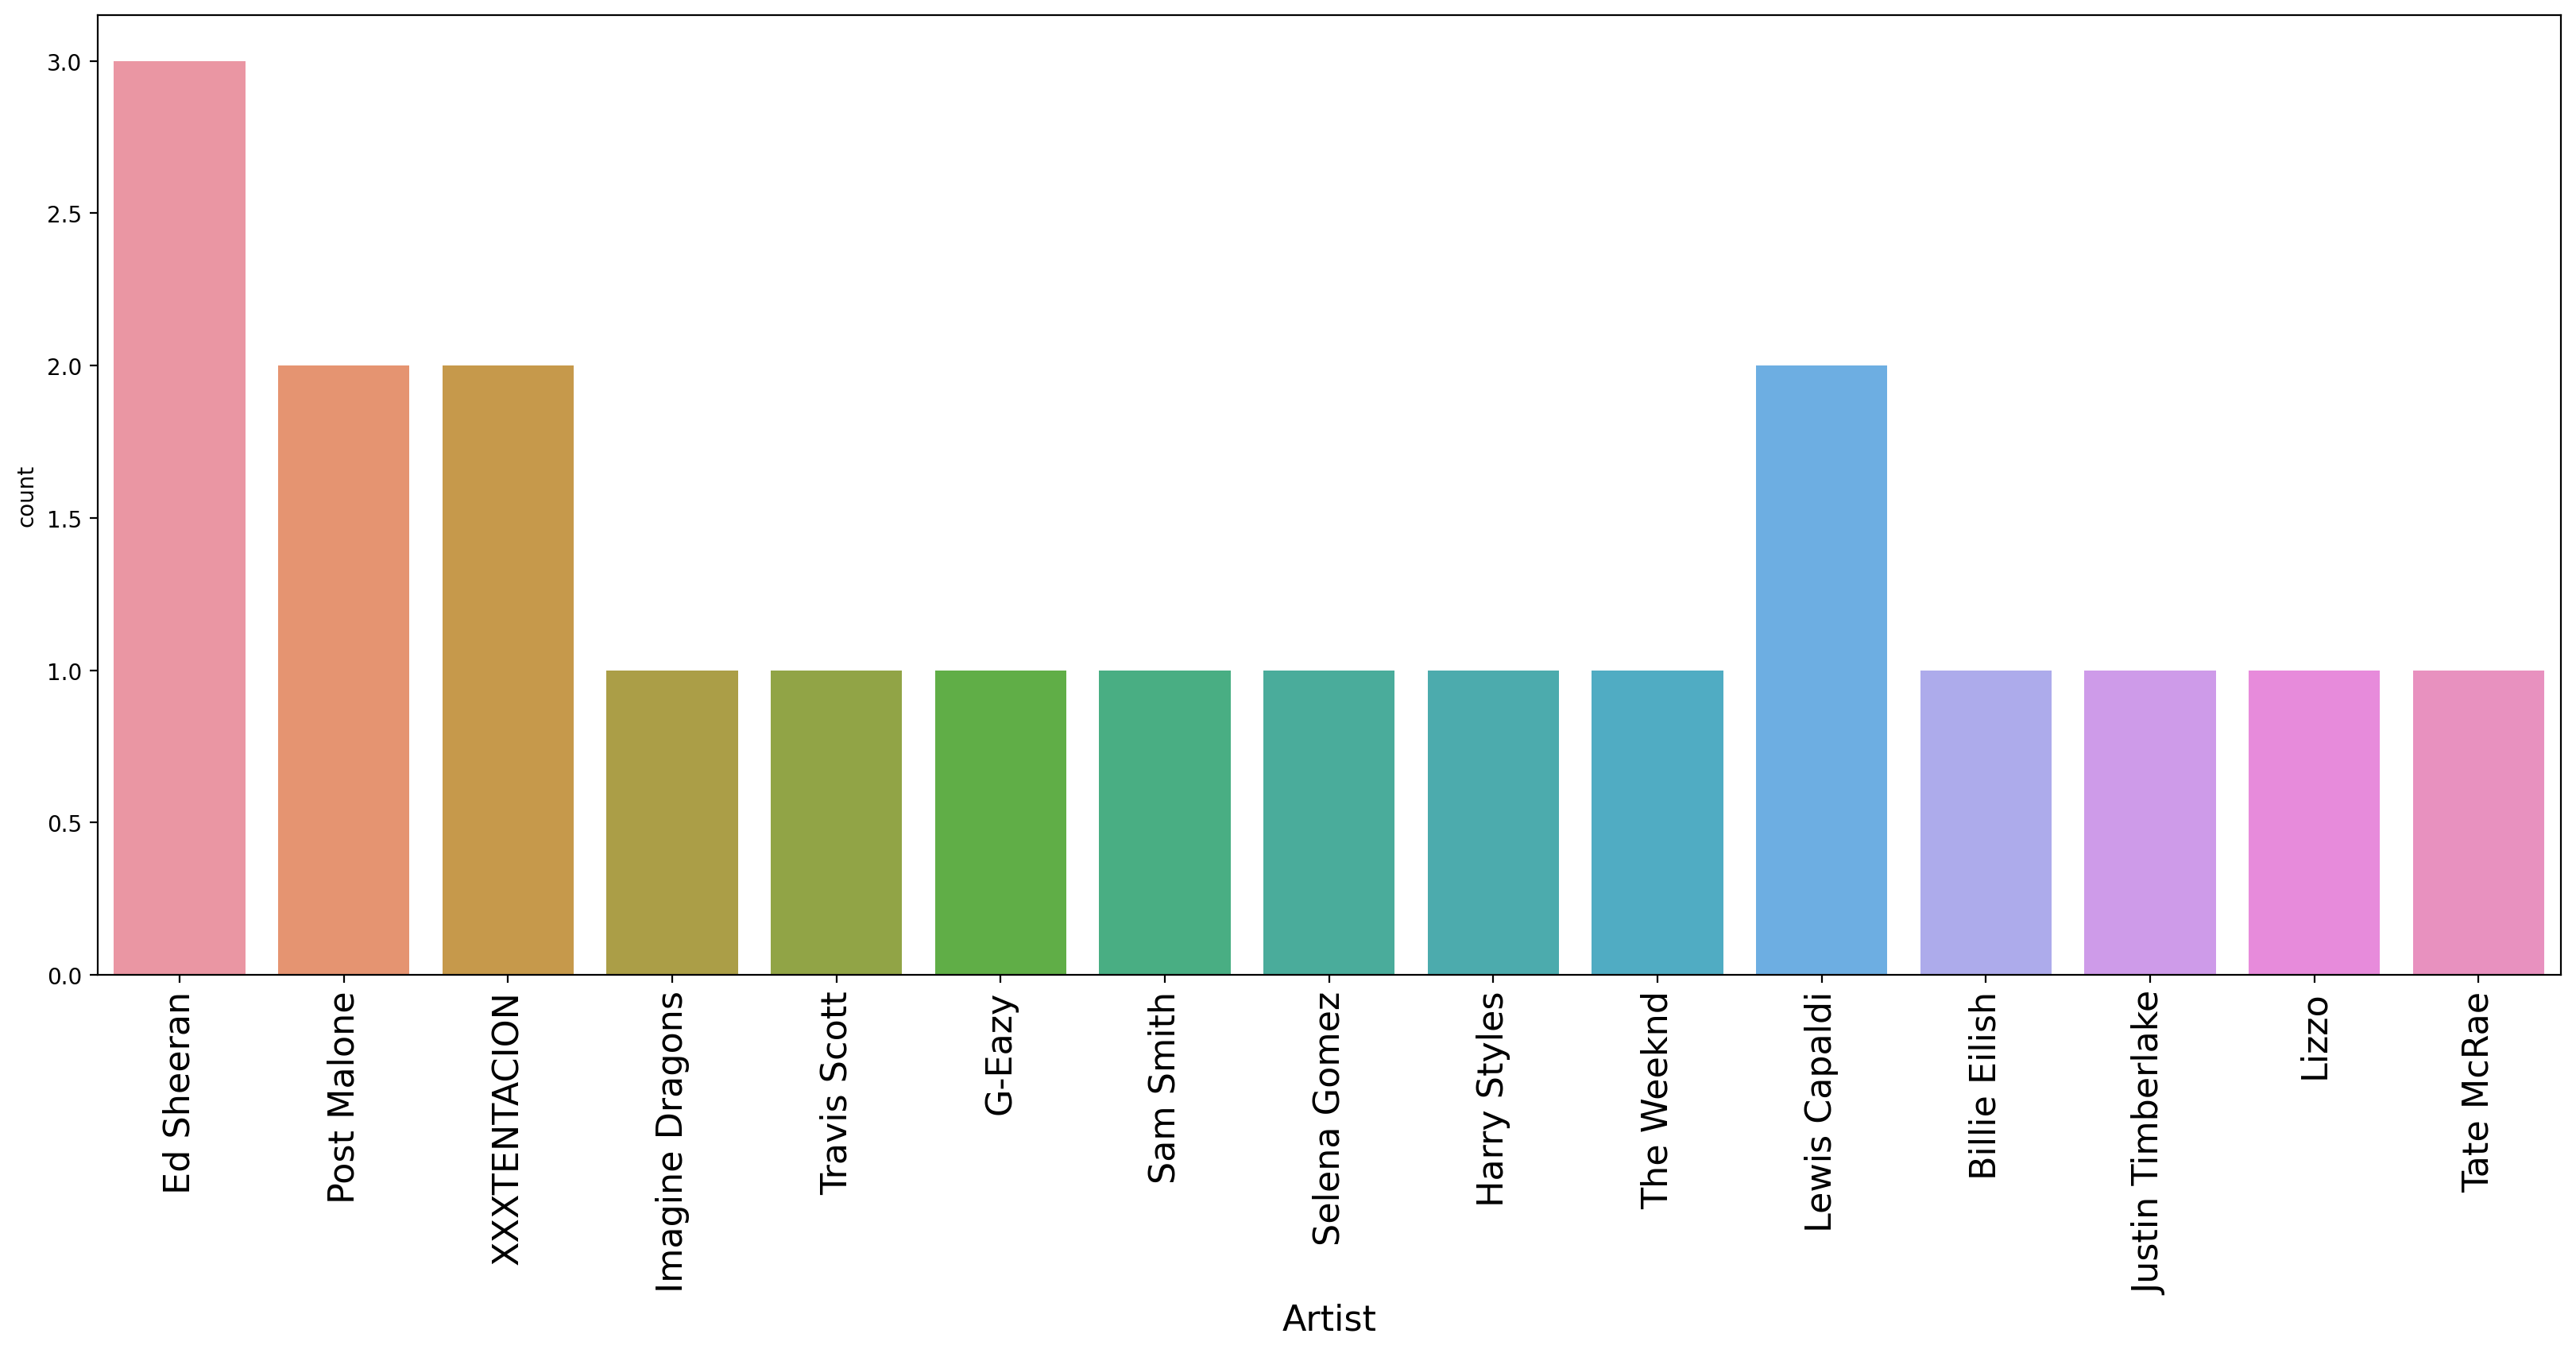

In [81]:
plt.figure(figsize=(20,8),dpi=200)
sns.countplot(data=Daniel_playlist_with_genres,x="artist")
plt.xlabel("Artist",fontsize=16)
plt.xticks(rotation=90,fontsize=16);

# Song years in my playlist

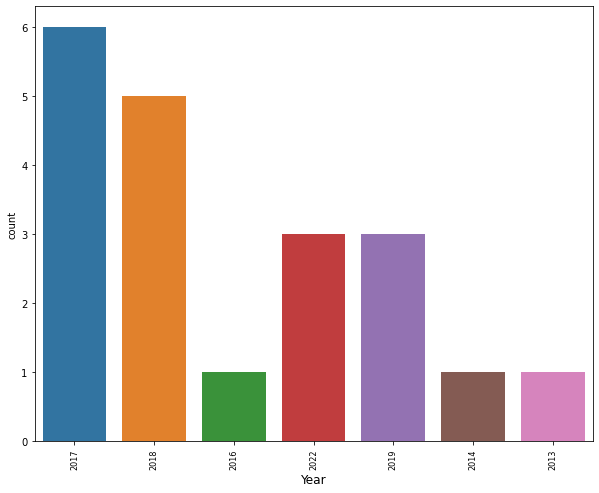

In [82]:
plt.figure(figsize=(10,8))
sns.countplot(data=Daniel_playlist_with_genres,x="year")
plt.xlabel("Year",fontsize=12)
plt.xticks(rotation=90,fontsize=8);

# 2.1) Clustering by Songs Features with K-Means

## Preparing data

In [106]:
Songs_df = pd.read_excel("Spotify Songs.xlsx")
Songs_df = Songs_df.drop("Unnamed: 0",axis=1)

In [107]:
Songs_feat_df = pd.read_excel('Spotify Songs Features.xlsx')
Songs_feat_df = Songs_feat_df.drop(['dur','pop'],axis=1)
Songs_feat_df.head()

,loudness,energy,liveness,valence,acousticness,speechiness
0,-9.211,0.449,0.552,0.357,0.0332,0.1090
1,-6.312,0.448,0.106,0.168,0.1630,0.0232
2,-6.458,0.783,0.083,0.579,0.0470,0.0856
3,-4.333,0.523,0.132,0.394,0.1840,0.0300
4,-6.136,0.520,0.131,0.129,0.1240,0.0712


## Scaling data

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_songs = scaler.fit_transform(Songs_feat_df)

## Elbow Method

In [109]:
from sklearn.cluster import KMeans

In [110]:
ssd = [] #sum squared distances
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_songs)
    ssd.append(model.inertia_) #SSD point --> cluster center

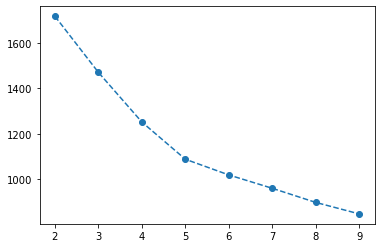

In [111]:
plt.plot(range(2,10),ssd,'o--');

## Choose k = 5

In [112]:
model = KMeans(n_clusters=5,random_state=101)

In [113]:
# fit_transform
cluster_labels = model.fit_predict(scaled_songs)

In [114]:
Songs_df["Cluster"] = cluster_labels

In [115]:
Songs_feat_df["Cluster"] = cluster_labels

In [116]:
Songs_feat_df.groupby("Cluster").agg("mean")

,loudness,energy,liveness,valence,acousticness,speechiness
Cluster,,,,,,
0,-6.230035,0.621263,0.134328,0.327995,0.148492,0.068715
1,-5.564339,0.709758,0.371177,0.587387,0.147136,0.073381
2,-4.939902,0.728882,0.106980,0.662480,0.142120,0.076294
3,-7.314360,0.599340,0.171334,0.485760,0.175416,0.308720
4,-8.933286,0.397357,0.137684,0.344254,0.658643,0.059618


In [117]:
Songs_df

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.5520,0.357,199,0.0332,0.1090,82,1
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.1630,0.0232,85,0
2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.0830,0.579,164,0.0470,0.0856,75,2
3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.1320,0.394,217,0.1840,0.0300,80,0
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.1240,0.0712,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,In My Mind,Alok,"['electro house', 'pop nacional', 'slap house']",2021,-5.482,0.746,0.2250,0.425,176,0.0947,0.0401,61,0
380,GHOST TOWN,Benson Boone,['pop'],2021,-10.064,0.335,0.1020,0.116,194,0.3890,0.0763,80,4
381,Cure For Me,AURORA,"['art pop', 'norwegian pop']",2021,-5.860,0.764,0.0880,0.416,202,0.0933,0.0554,59,0
382,Paranoia,Daria,['polish pop'],2021,-5.087,0.821,0.0792,0.946,166,0.2820,0.0362,63,2


## Mapping Cluster to Personal Playlist

In [118]:
Daniel_Truong_df = pd.read_excel("Daniel_Spotify_Playlist_Without_Genres.xlsx")

In [119]:
mask  = Songs_df.title.isin(Daniel_Truong_df.title)

In [120]:
Clustered_Daniel_Truong_df = Songs_df[mask]
Clustered_Daniel_Truong_df

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.16300,0.0232,85,0
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.12400,0.0712,84,0
16,SAD!,XXXTENTACION,"['emo rap', 'miami hip hop']",2018,-4.880,0.613,0.1230,0.473,167,0.25800,0.1450,83,0
21,Thunder,Imagine Dragons,"['modern rock', 'rock']",2017,-4.833,0.822,0.1470,0.288,187,0.00671,0.0438,83,0
38,I Fall Apart,Post Malone,"['dfw rap', 'melodic rap', 'rap']",2016,-5.408,0.538,0.1960,0.291,223,0.06890,0.0382,79,0
41,SICKO MODE,Travis Scott,"['hip hop', 'rap', 'slap house']",2018,-3.714,0.730,0.1240,0.446,313,0.00513,0.2220,82,2
44,Him & I (with Halsey),G-Eazy,"['indie pop rap', 'oakland hip hop', 'pop', 'p...",2017,-6.343,0.731,0.3080,0.191,269,0.05340,0.0868,76,0
48,Too Good At Goodbyes,Sam Smith,"['dance pop', 'pop', 'uk pop']",2017,-8.237,0.372,0.1690,0.476,201,0.64000,0.0432,73,4
59,Wolves,Selena Gomez,"['dance pop', 'pop', 'post-teen pop']",2017,-4.614,0.804,0.2040,0.306,198,0.12400,0.0448,79,0
70,Shape of You,Ed Sheeran,"['pop', 'uk pop']",2017,-3.183,0.652,0.0931,0.931,234,0.58100,0.0802,85,2


## Filter out songs datasets based on user clustered songs

In [121]:
masked_songs = Songs_df.Cluster.isin(Clustered_Daniel_Truong_df.Cluster)

In [122]:
filtered_songs = Songs_df[masked_songs]
filtered_songs

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
0,God's Plan,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",2018,-9.211,0.449,0.5520,0.357,199,0.0332,0.1090,82,1
1,Perfect,Ed Sheeran,"['pop', 'uk pop']",2017,-6.312,0.448,0.1060,0.168,263,0.1630,0.0232,85,0
2,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,"['dance pop', 'electropop', 'pop', 'post-teen ...",2017,-6.458,0.783,0.0830,0.579,164,0.0470,0.0856,75,2
3,Havana (feat. Young Thug),Camila Cabello,"['dance pop', 'pop', 'post-teen pop']",2018,-4.333,0.523,0.1320,0.394,217,0.1840,0.0300,80,0
4,rockstar (feat. 21 Savage),Post Malone,"['dfw rap', 'melodic rap', 'rap']",2018,-6.136,0.520,0.1310,0.129,218,0.1240,0.0712,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,In My Mind,Alok,"['electro house', 'pop nacional', 'slap house']",2021,-5.482,0.746,0.2250,0.425,176,0.0947,0.0401,61,0
380,GHOST TOWN,Benson Boone,['pop'],2021,-10.064,0.335,0.1020,0.116,194,0.3890,0.0763,80,4
381,Cure For Me,AURORA,"['art pop', 'norwegian pop']",2021,-5.860,0.764,0.0880,0.416,202,0.0933,0.0554,59,0
382,Paranoia,Daria,['polish pop'],2021,-5.087,0.821,0.0792,0.946,166,0.2820,0.0362,63,2


# 2.2) Content-based Filtering by Genres

## One-Hot Encoding Filtered Songs

In [ ]:
filtered_songs_with_genres = filtered_songs.copy(deep=True)
filtered_songs_with_genres['top genre'] = filtered_songs_with_genres['top genre'].str.replace("'","")
filtered_songs_with_genres['top genre'] = filtered_songs_with_genres['top genre'].str.replace("[","")
filtered_songs_with_genres['top genre'] = filtered_songs_with_genres['top genre'].str.replace("]","")

In [ ]:
for index, row in filtered_songs_with_genres.iterrows():
    arr = row['top genre'].split(',')
    for genre in arr:
        filtered_songs_with_genres.at[index,genre] = 1

In [54]:
filtered_songs_with_genres = filtered_songs_with_genres.fillna(0)
cols_to_drop = ['title','artist','top genre','year','loudness','energy','liveness','valence','dur','acousticness','speechiness','pop','Cluster']
filtered_songs_with_genres = filtered_songs_with_genres.drop(cols_to_drop,axis=1)

In [55]:
filtered_songs_with_genres['song id'] = filtered_songs.index

In [56]:
filtered_songs_with_genres.to_excel('Spotify_Songs_Genres.xlsx',sheet_name='ML Project',index=False)

## One-Hot-Encoding User Songs (Learn user profile)

In [57]:
Daniel_songs_with_genres = Clustered_Daniel_Truong_df.copy(deep = True)

In [ ]:
filtered_songs_with_genres = filtered_songs.copy(deep=True)
filtered_songs_with_genres['top genre'] = filtered_songs_with_genres['top genre'].str.replace("'","")
filtered_songs_with_genres['top genre'] = filtered_songs_with_genres['top genre'].str.replace("[","")
filtered_songs_with_genres['top genre'] = filtered_songs_with_genres['top genre'].str.replace("]","")

In [ ]:
x = []
for index, row in Daniel_songs_with_genres.iterrows():
    arr = row['top genre'].split(',')
    x.append(index)
    for genre in arr:
        Daniel_songs_with_genres.at[index,genre] = 1

In [61]:
Daniel_songs_with_genres = Daniel_songs_with_genres.fillna(0)
cols_to_drop = ['title','artist','top genre','year','loudness','energy','liveness','valence','dur','acousticness','speechiness','pop','Cluster']
Daniel_songs_with_genres = Daniel_songs_with_genres.drop(cols_to_drop,axis=1)

In [62]:
Daniel_songs_with_genres['song id'] = Daniel_songs_with_genres.index

In [63]:
Daniel_songs_with_genres.to_excel('Daniel_Songs_Genres.xlsx',sheet_name='ML Project',index=False)

## Build User Profile

In [64]:
Daniel_genres = pd.read_excel("Daniel_Songs_Genres.xlsx")

In [65]:
Daniel_genres.columns

Index([' uk pop', 'dfw rap', ' melodic rap', ' rap', 'emo rap',
       ' miami hip hop', 'modern rock', ' rock', 'hip hop', ' slap house',
       'indie pop rap', ' oakland hip hop', ' pop', ' pop rap', 'dance pop',
       ' post-teen pop', 'canadian contemporary r&b', ' canadian pop',
       'art pop', ' electropop', ' escape room', ' minnesota hip hop',
       ' trap queen', 'song id'],
      dtype='object')

In [66]:
Daniel_profile = pd.DataFrame()
Daniel_genres = Daniel_genres.drop('song id',axis = 1)
for (columnName, columnData) in Daniel_genres.iteritems():
    genre = columnName
    Daniel_profile[genre] = [columnData.sum()]

In [67]:
Daniel_profile_built = Daniel_profile.sum().astype(float) #Get categories score for user

In [68]:
Daniel_profile_built.sort_values(ascending=False)

 pop                         7.0
 uk pop                      6.0
 rap                         4.0
dance pop                    4.0
 melodic rap                 2.0
emo rap                      2.0
 miami hip hop               2.0
dfw rap                      2.0
 post-teen pop               1.0
 minnesota hip hop           1.0
 escape room                 1.0
 electropop                  1.0
art pop                      1.0
 canadian pop                1.0
canadian contemporary r&b    1.0
 oakland hip hop             1.0
 pop rap                     1.0
indie pop rap                1.0
 slap house                  1.0
hip hop                      1.0
 rock                        1.0
modern rock                  1.0
 trap queen                  1.0
dtype: float64

In [69]:
Daniel_profile_built.sum()

44.0

In [70]:
Daniel_profile_built.index

Index([' uk pop', 'dfw rap', ' melodic rap', ' rap', 'emo rap',
       ' miami hip hop', 'modern rock', ' rock', 'hip hop', ' slap house',
       'indie pop rap', ' oakland hip hop', ' pop', ' pop rap', 'dance pop',
       ' post-teen pop', 'canadian contemporary r&b', ' canadian pop',
       'art pop', ' electropop', ' escape room', ' minnesota hip hop',
       ' trap queen'],
      dtype='object')

# Recommendation Table

In [71]:
Songs_genre = pd.read_excel("Spotify_Songs_Genres.xlsx")

In [72]:
Songs_genre

,canadian hip hop,canadian pop,hip hop,rap,toronto rap,uk pop,dance pop,electropop,pop,post-teen pop,...,belgian edm,romanian house,romanian pop,edm,uk hip hop,electro house,norwegian pop,polish pop,scandipop,song id
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,379
330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,381
332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,382


In [ ]:
Songs_genre_fin = Songs_genre[Daniel_profile_built.index]
Songs_genre_fin['song id'] = Songs_genre['song id']

In [79]:
Songs_genre_fin =  Songs_genre_fin.set_index('song id')

In [80]:
Songs_genre_fin

,uk pop,dfw rap,melodic rap,rap,emo rap,miami hip hop,modern rock,rock,hip hop,slap house,...,pop rap,dance pop,post-teen pop,canadian contemporary r&b,canadian pop,art pop,electropop,escape room,minnesota hip hop,trap queen
song id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
song_recommendation = (Songs_genre_fin.dot(Daniel_profile_built)) / Daniel_profile_built.sum() #Dot product to calculate between vectors

In [82]:
song_recommendation = song_recommendation.sort_values(ascending=False)
song_recommendation

song id
206    0.409091
202    0.409091
255    0.409091
15     0.386364
214    0.386364
         ...   
157    0.000000
271    0.000000
150    0.000000
149    0.000000
383    0.000000
Length: 334, dtype: float64

# 3) Result

In [83]:
top_20 = song_recommendation.index[:20].tolist()

In [84]:
recommend_playlist = filtered_songs.loc[top_20, :]

In [85]:
recommend_playlist

,title,artist,top genre,year,loudness,energy,liveness,valence,dur,acousticness,speechiness,pop,Cluster
206,Our Song,Anne-Marie,"['dance pop', 'pop', 'pop dance', 'post-teen p...",2021,-4.245,0.759,0.1720,0.515,164,0.14100,0.0423,69,2
202,Kiss My (Uh Oh),Anne-Marie,"['dance pop', 'pop', 'pop dance', 'post-teen p...",2021,-3.639,0.878,0.3080,0.481,177,0.01510,0.0484,52,1
255,Not a Pop Song,Little Mix,"['dance pop', 'girl group', 'pop', 'post-teen ...",2020,-4.715,0.651,0.0782,0.355,179,0.27900,0.0372,56,0
15,New Rules,Dua Lipa,"['dance pop', 'pop', 'uk pop']",2017,-6.021,0.700,0.1530,0.608,209,0.00261,0.0694,80,2
214,My Heart Goes (La Di Da) (feat. Topic),Becky Hill,"['dance pop', 'edm', 'pop', 'pop dance', 'pop ...",2021,-5.578,0.781,0.2950,0.456,149,0.01850,0.0452,77,1
222,Last Time,Becky Hill,"['dance pop', 'edm', 'pop', 'pop dance', 'pop ...",2021,-2.421,0.794,0.1060,0.754,215,0.30500,0.0699,60,2
226,Let’s Go Home Together,Ella Henderson,"['dance pop', 'pop', 'pop dance', 'talent show...",2021,-4.438,0.486,0.0994,0.309,209,0.45400,0.0431,61,0
230,Forever Young - Rezidential Remix,Becky Hill,"['dance pop', 'edm', 'pop', 'pop dance', 'pop ...",2020,-8.616,0.651,0.1140,0.201,229,0.15700,0.0345,50,0
244,Say It Again,Griff,"['dance pop', 'pop', 'tropical house', 'uk pop']",2020,-6.393,0.570,0.0737,0.273,217,0.29000,0.1720,48,0
249,Black Hole,Griff,"['dance pop', 'pop', 'tropical house', 'uk pop']",2021,-5.641,0.640,0.0981,0.658,201,0.14200,0.0591,65,2
